In [ ]:
# Implementing Auto Encoder for missing data imputation on full dataset

In [106]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from warnings import simplefilter
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import tqdm

print(f'tf version: {tf.__version__}')
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

tf version: 2.10.0


In [107]:
df=pd.read_csv("water_hh_all.csv", low_memory=False)

In [108]:
df.head(5)

,Unnamed: 0,DHSID,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,anything done to water to make safe to drink,source of drinking water (categorized by type),source of drinking water (weights),water shortages,PCA w_location_weighting all,source of drinking water (categorized piped),source of drinking water (categorized piped 2),source of drinking water (categorized piped 3)
0,0,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
1,1,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
2,2,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
3,3,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
4,4,AO201100000001,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling


In [109]:
df.shape

(970636, 18)

# dropping columns

In [110]:
df.drop(['Unnamed: 0', 'DHSID'], axis=1, inplace=True)

In [111]:
df.head(5)

,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,anything done to water to make safe to drink,source of drinking water (categorized by type),source of drinking water (weights),water shortages,PCA w_location_weighting all,source of drinking water (categorized piped),source of drinking water (categorized piped 2),source of drinking water (categorized piped 3)
0,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
1,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
2,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
3,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling
4,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,NaN,piped,5.0,NaN,-3.128714,piped into dwelling,piped into dwelling,piped into dwelling


# dropping more columns

In [112]:
df.drop(['anything done to water to make safe to drink','source of drinking water (weights)','water shortages', 'PCA w_location_weighting all','source of drinking water (categorized piped)','source of drinking water (categorized piped 2)', 'source of drinking water (categorized piped 3)'],axis=1, inplace=True)

In [113]:
df.shape

(970636, 9)

## dropping all rows with missing values in location column

In [114]:
df = df.dropna(subset=['location of source for water'], how='all')

In [115]:
df['location of source for water'].isnull().sum()

0

In [116]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=0)

In [117]:
train.head(5)

,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,source of drinking water (categorized by type)
315852,GNGE71FL,GN7,2018.0,R,faranah,Tube well or borehole,240.0,elsewhere,tube well or borehole
440545,MDGE71FL,MD7,2016.0,R,bongolava,public tap/standpipe,5.0,elsewhere,piped
491492,MWGE62FL,MW5,2010.0,R,southern,unprotected well,15.0,elsewhere,well
570740,NGGE6AFL,NG6,2013.0,R,north central,surface water,90.0,elsewhere,surface water
649850,NGGE7BFL,NG7,2018.0,R,south south,Tube well or borehole,10.0,elsewhere,tube well or borehole


In [118]:
test.head(5)

,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,source of drinking water (categorized by type)
408436,LSGE62FL,LS5,2009.0,R,thaba-tseka,unprotected well,60.0,elsewhere,well
44053,BFGE71FL,BF6,2014.0,U,sahel,public tap/standpipe,10.0,elsewhere,piped
73041,BJGE71FL,BJ7,2018.0,R,borgou,unprotected well,30.0,elsewhere,well
203423,ETGE61FL,ET6,2003.0,R,oromiya,surface water,10.0,elsewhere,surface water
96818,BUGE71FL,BU7,2016.0,R,mwaro,protected spring,30.0,elsewhere,spring


## missing values in dataframe


In [119]:
#finding null values
df.isnull().sum()

GEID                                                  0
country code and phase                            18620
year of interview                                     0
URBAN_RURA                                         9076
region                                            42462
source of drinking water (simplified)               171
time to get to water source (minutes)             29188
location of source for water                          0
source of drinking water (categorized by type)      171
dtype: int64

In [120]:
#total 
df.shape

(716814, 9)

## train and test set

In [121]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=0)

In [122]:
train.head(5)

,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,source of drinking water (categorized by type)
315852,GNGE71FL,GN7,2018.0,R,faranah,Tube well or borehole,240.0,elsewhere,tube well or borehole
440545,MDGE71FL,MD7,2016.0,R,bongolava,public tap/standpipe,5.0,elsewhere,piped
491492,MWGE62FL,MW5,2010.0,R,southern,unprotected well,15.0,elsewhere,well
570740,NGGE6AFL,NG6,2013.0,R,north central,surface water,90.0,elsewhere,surface water
649850,NGGE7BFL,NG7,2018.0,R,south south,Tube well or borehole,10.0,elsewhere,tube well or borehole


In [124]:
tf.random.set_seed(6688)
random.seed(6688)
np.random.seed(6688)

In [125]:
train.shape

(573451, 9)

## Statistic of missing value

In [126]:
def statMissingValue(X):
    lstSummary = []
    for col in X.columns:
        liTotal = len(X.index)
        liMissing = X[col].isna().sum()
        lfMissingRate = round(liMissing * 100/liTotal,2)
        liZero = 0
        liNUnique = X[col].nunique()
        if(X[col].dtype!='object'):
            liZero = X[col].isin([0]).sum()
        lfZeroRate = round(liZero*100/liTotal,2)
        lstSummary.append([col,str(X[col].dtype),liTotal, liNUnique, liMissing, lfMissingRate,liZero,lfZeroRate])    
    return pd.DataFrame(lstSummary,columns=['feature','col_type','total', 'unique', 'na','na_rate','zero','zero_rate'])

## Review statistic on each feature

In [127]:
df_stat = statMissingValue(train)
print(df_stat.feature.to_list())
df_stat

['GEID', 'country code and phase', 'year of interview', 'URBAN_RURA', 'region', 'source of drinking water (simplified)', 'time to get to water source (minutes)', 'location of source for water', 'source of drinking water (categorized by type)']


,feature,col_type,total,unique,na,na_rate,zero,zero_rate
0,GEID,object,573451,79,0,0.00,0,0.00
1,country code and phase,object,573451,56,15014,2.62,0,0.00
2,year of interview,float64,573451,15,0,0.00,0,0.00
3,URBAN_RURA,object,573451,2,7256,1.27,0,0.00
4,region,object,573451,373,34031,5.93,0,0.00
5,source of drinking water (simplified),object,573451,15,138,0.02,0,0.00
6,time to get to water source (minutes),float64,573451,249,23483,4.10,61073,10.65
7,location of source for water,object,573451,3,0,0.00,0,0.00
8,source of drinking water (categorized by type),object,573451,8,138,0.02,0,0.00


Remarks:

* "URBAN_RURA" has only 2 unique value so it must be categorical type. Same for "location of source for water", "source of drinking water (categorized by type)".
* "time to get to water source (minutes)" is numeric.

## plotting missing value for each feature


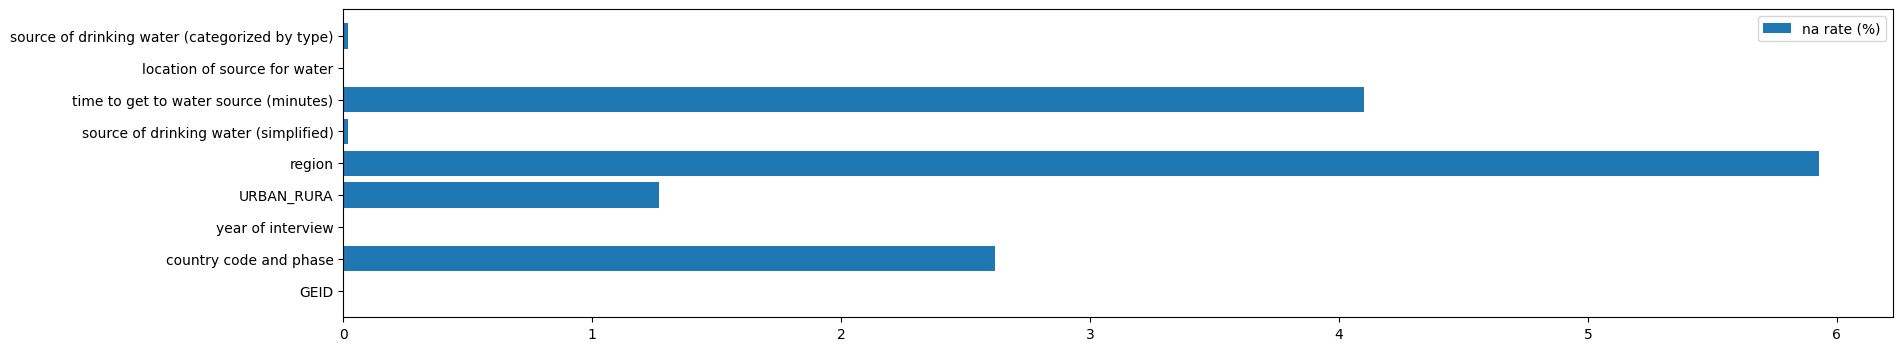

In [128]:
plt.figure(figsize=(20,4))
plt.barh(df_stat.feature, df_stat.na_rate, label='na rate (%)')
plt.legend()
plt.show()

In [129]:
# replacing values
train['location of source for water'].replace(['elsewhere','in own yard/plot','in own dwelling'],
                        [0,1,2], inplace=True)

* we can do imputation of all listed features

## Rephrasing columns

In [130]:
col_id = ['GEID']
col_target = ['location of source for water']
col_cat_big = ['source of drinking water (categorized by type)', 'source of drinking water (simplified)']
col_cat_small = ['region', 'URBAN_RURA', 'country code and phase']
col_cat = col_cat_big + col_cat_small
col_num = ['time to get to water source (minutes)', 'year of interview']

In [131]:
def fill_na_with_random(df_ref, df_na):
    df_ret = df_na.copy()
    for col in df_ret.columns:
        ret_nan = df_ret[col][df_ret[col].isna()]
        ref_n_nan = df_ref[~df_ref[col].isna()][col]
        
        df_ret[col].loc[df_ret[col].isna()] = np.random.choice(ref_n_nan,size=len(ret_nan))
    return df_ret

# Model

In [135]:
x_full = train[col_num+col_cat]
y_full = train[col_target]

x_valid = test[col_num+col_cat]

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.25, random_state=6668)

x_ref = x_train.copy()

x_train = fill_na_with_random(x_ref, x_train)
x_test = fill_na_with_random(x_ref, x_test)
x_valid = fill_na_with_random(x_ref, x_valid)

/tmp/ipykernel_297698/1333752729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ret[col].loc[df_ret[col].isna()] = np.random.choice(ref_n_nan,size=len(ret_nan))


In [136]:
x_train.isna().sum()

time to get to water source (minutes)             0
year of interview                                 0
source of drinking water (categorized by type)    0
source of drinking water (simplified)             0
region                                            0
URBAN_RURA                                        0
country code and phase                            0
dtype: int64

In [137]:
y_train.head(5)

,location of source for water
151387,0
412923,0
927016,0
111348,0
744284,0


In [138]:
y_test.head(5)

,location of source for water
608261,0
117913,0
139152,0
773508,0
562385,1


## encode category pipeline

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.preprocessing import PowerTransformer
import category_encoders as ce
from xgboost import XGBClassifier
import lightgbm

# Preprocessing for numerical data
numerical_transformer = Pipeline(verbose=False,steps=[
    ('scale', StandardScaler(with_mean=True,with_std=True)),
])

# Preprocessing for categorical data
categorical_onehot_transformer = Pipeline(verbose=False,steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

categorical_count_transformer = Pipeline(verbose=False,steps=[
    ('count', ce.CountEncoder(min_group_size = 3)),
    ('scale', StandardScaler(with_mean=True,with_std=True)),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(verbose=False,
    transformers=[
        ('pre_cat_count', categorical_count_transformer, col_cat_big),
        ('pre_cat_onehot', categorical_onehot_transformer, col_cat_small),
        ('pre_num', numerical_transformer, col_num),
    ])

## Executing encoded process

In [140]:
preprocessor.fit(x_train)
x_train_encoded =  preprocessor.transform(x_train)
x_test_encoded = preprocessor.transform(x_test)
x_valid_encoded = preprocessor.transform(x_valid)

## Impute missing value using auto encoder

In [141]:
input_dim = x_train_encoded.shape[1]
model_impute = keras.Sequential()
model_impute.add(layers.Dense(20,activation='gelu', input_dim=input_dim, kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(16,activation='gelu', kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(10,activation='gelu', kernel_initializer='he_uniform', name='bottleneck'))
model_impute.add(layers.Dense(16,activation='gelu', kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(20,activation='gelu', kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(input_dim,activation='linear', kernel_initializer='he_uniform'))

optimizer = keras.optimizers.Adam(learning_rate=0.03)
model_impute.compile(optimizer = optimizer, loss = 'msle')
model_impute.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 20)                8720      
                                                                 
 dense_16 (Dense)            (None, 16)                336       
                                                                 
 bottleneck (Dense)          (None, 10)                170       
                                                                 
 dense_17 (Dense)            (None, 16)                176       
                                                                 
 dense_18 (Dense)            (None, 20)                340       
                                                                 
 dense_19 (Dense)            (None, 435)               9135      
                                                                 
Total params: 18,877
Trainable params: 18,877
Non-trai

In [142]:
tf.keras.utils.plot_model(model_impute, show_shapes=True,rankdir='LR')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [143]:
!pip install pydot

In [144]:
!pip install graphviz

In [145]:
def make_noisy(np_data):
    np_ret = np.copy(np_data)
    for i in range(np_ret.shape[1]):
        np.random.shuffle(np_ret[:,i])
    return np_ret

In [146]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)

In [147]:
np.isnan(x_train_encoded)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [148]:
noise_X = make_noisy(x_train_encoded)

In [149]:
# noise_X = np.concatenate((noise_X, make_noisy(noise_X)), axis=0)
noise_X = np.concatenate((noise_X, np.copy(x_train_encoded)), axis=0)

his = model_impute.fit(noise_X, noise_X, epochs = 2000, batch_size = 512, shuffle = True, callbacks=[es], verbose=0)

Epoch 52: early stopping


In [150]:
np.isnan(noise_X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [151]:
x_train_encoded.shape

(430088, 435)

 ## Plot learning curve

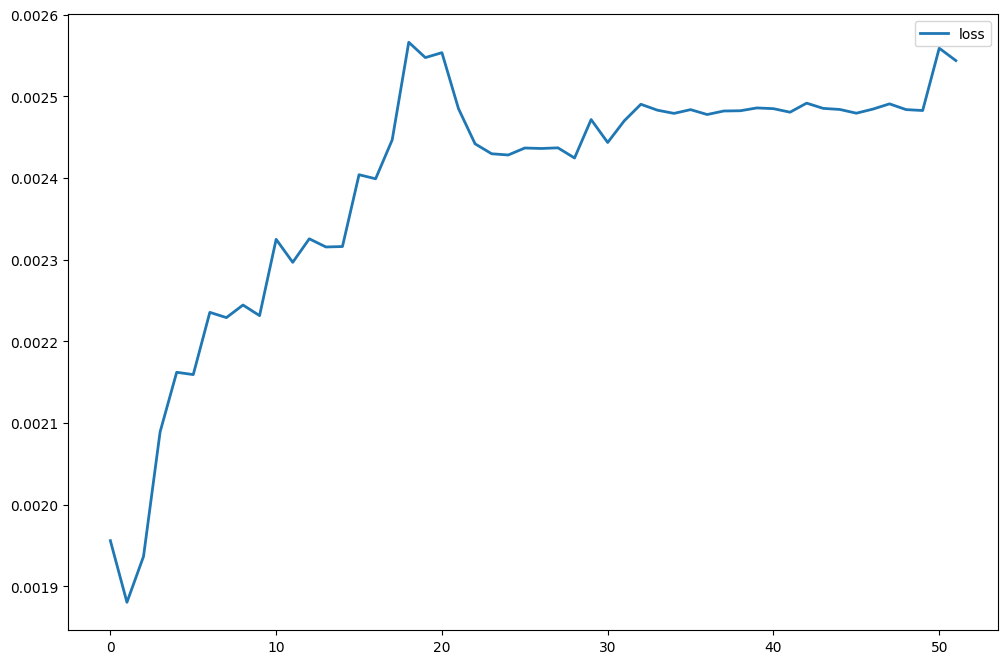

In [152]:
plt.figure(figsize=(12,8))
plt.plot(his.epoch,his.history['loss'], label='loss', linewidth=2)
plt.legend()
plt.show()

## Create final dataset with impute missing value by auto encoder

In [153]:
x_train_impute = model_impute.predict(x_train_encoded)
x_test_impute = model_impute.predict(x_test_encoded)
x_valid_impute = model_impute.predict(x_valid_encoded)

4481/4481 [==============================] - 2s 423us/step


In [154]:
x_train_impute

array([[-2.3125887 ,  0.25607765, -3.6294084 , ..., -2.972117  ,
        -0.25664836, -0.04000235],
       [-0.15850395,  0.34405357, -1.1028751 , ..., -0.81586385,
        -0.22472379, -0.11146887],
       [-0.6274942 , -0.05543923, -1.3254948 , ..., -1.0223941 ,
        -0.04190737, -0.0879199 ],
       ...,
       [ 0.78993195, -0.5843743 , -1.0261595 , ..., -0.8449742 ,
         0.20867878, -0.2936477 ],
       [ 0.945447  ,  1.376046  , -0.61821985, ..., -0.371158  ,
        -1.1310712 ,  0.51158726],
       [ 0.9659047 ,  1.398363  , -0.5441783 , ..., -0.332628  ,
        -1.1980627 ,  1.1960167 ]], dtype=float32)

## Model for location prediction

In [155]:
from sklearn.metrics import accuracy_score
def get_score(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)

In [156]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

# Best param
# best_n_est = int(best_param[0])
best_n_est = 1000
xgb = XGBClassifier(n_estimators=best_n_est,learning_rate=1e-3,seed=6688)
xgb.fit(x_train_impute, y_train)

print(f'train score: {get_score(xgb,x_train_impute,y_train)}')
print(f'test score: {get_score(xgb,x_test_impute,y_test)}')

train score: 0.9038313089414259
test score: 0.9048569017110412


## Submit result to leaderboard


In [161]:
y_valid = xgb.predict(x_valid_impute)

In [162]:
df_submit = pd.DataFrame({'GEID': test.GEID, 'location of source for water': y_valid})
df_submit.tail(10)

,GEID,location of source for water
892795,UGGE7AFL,0
683958,RWGE61FL,0
722665,SLGE61FL,0
34828,BFGE61FL,0
646296,NGGE7BFL,0
745807,SLGE7AFL,0
136793,CIGE61FL,0
886674,UGGE7AFL,0
157929,CMGE71FL,0
326863,KEGE71FL,0


In [163]:
#in own dwelling
df_submit.loc[(df_submit['location of source for water'] == 2)]

,GEID,location of source for water
584498,NGGE6AFL,2
611449,NGGE71FL,2
579148,NGGE6AFL,2
579642,NGGE6AFL,2
590177,NGGE6AFL,2
...,...,...
647944,NGGE7BFL,2
585318,NGGE6AFL,2
644608,NGGE7BFL,2
588575,NGGE6AFL,2


In [164]:
#in own yard
df_submit.loc[(df_submit['location of source for water'] == 1)]

,GEID,location of source for water
836675,TZGE7AFL,1
634574,NGGE7BFL,1
788770,TDGE71FL,1
65538,BJGE61FL,1
800287,TGGE62FL,1
...,...,...
338725,KEGE71FL,1
930634,ZMGE61FL,1
635648,NGGE7BFL,1
329330,KEGE71FL,1


In [165]:
#elsewhere
df_submit.loc[(df_submit['location of source for water'] == 0)]

,GEID,location of source for water
408436,LSGE62FL,0
44053,BFGE71FL,0
73041,BJGE71FL,0
203423,ETGE61FL,0
96818,BUGE71FL,0
...,...,...
745807,SLGE7AFL,0
136793,CIGE61FL,0
886674,UGGE7AFL,0
157929,CMGE71FL,0


In [166]:
x_train_impute

array([[-2.3125887 ,  0.25607765, -3.6294084 , ..., -2.972117  ,
        -0.25664836, -0.04000235],
       [-0.15850395,  0.34405357, -1.1028751 , ..., -0.81586385,
        -0.22472379, -0.11146887],
       [-0.6274942 , -0.05543923, -1.3254948 , ..., -1.0223941 ,
        -0.04190737, -0.0879199 ],
       ...,
       [ 0.78993195, -0.5843743 , -1.0261595 , ..., -0.8449742 ,
         0.20867878, -0.2936477 ],
       [ 0.945447  ,  1.376046  , -0.61821985, ..., -0.371158  ,
        -1.1310712 ,  0.51158726],
       [ 0.9659047 ,  1.398363  , -0.5441783 , ..., -0.332628  ,
        -1.1980627 ,  1.1960167 ]], dtype=float32)

## checking for missing values

In [167]:
np.isnan(x_train_impute)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [168]:
np.isnan(x_test_impute)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# one-hot encoding

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
from category_encoders.one_hot import OneHotEncoder

In [77]:
#creating instance of one-hot encoder
encoder=OneHotEncoder(handle_unknown='ignore')

## source

In [78]:
ohe=OneHotEncoder(use_cat_names=True)
df_source=ohe.fit_transform(df['source of drinking water (simplified)'])

In [79]:
df_source

,source of drinking water (simplified)_piped into dwelling,source of drinking water (simplified)_piped to yard/plot,source of drinking water (simplified)_public tap/standpipe,source of drinking water (simplified)_protected spring,source of drinking water (simplified)_street vendor,source of drinking water (simplified)_surface water,source of drinking water (simplified)_protected well,source of drinking water (simplified)_unprotected well,source of drinking water (simplified)_unprotected spring,source of drinking water (simplified)_bottled,source of drinking water (simplified)_Tube well or borehole,source of drinking water (simplified)_rainwater,source of drinking water (simplified)_other,source of drinking water (simplified)_piped to neighbor,source of drinking water (simplified)_nan,source of drinking water (simplified)_sachet
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970631,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
970632,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
970633,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
970634,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## time

In [80]:
df_time=df['time to get to water source (minutes)']

In [81]:
df_time

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
970631     0.0
970632     0.0
970633    10.0
970634     0.0
970635    10.0
Name: time to get to water source (minutes), Length: 970636, dtype: float64

## missing values in time column

In [82]:
print(df_new['time to get to water source (minutes)'].isnull().sum())

69813


## location

In [83]:
df_location=df['location of source for water']

In [84]:
df_location

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
                ...       
970631    in own yard/plot
970632    in own yard/plot
970633           elsewhere
970634    in own yard/plot
970635           elsewhere
Name: location of source for water, Length: 970636, dtype: object

## missing values in location

In [86]:
print(df_new['location of source for water'].isnull().sum())

253822


In [87]:
dataset_one=[df_source,df_time,df_location]

In [88]:
df_new=pd.concat(dataset_one,axis=1, join='inner')

### new dataset only with source,time and location

In [89]:
df_new

,source of drinking water (simplified)_piped into dwelling,source of drinking water (simplified)_piped to yard/plot,source of drinking water (simplified)_public tap/standpipe,source of drinking water (simplified)_protected spring,source of drinking water (simplified)_street vendor,source of drinking water (simplified)_surface water,source of drinking water (simplified)_protected well,source of drinking water (simplified)_unprotected well,source of drinking water (simplified)_unprotected spring,source of drinking water (simplified)_bottled,source of drinking water (simplified)_Tube well or borehole,source of drinking water (simplified)_rainwater,source of drinking water (simplified)_other,source of drinking water (simplified)_piped to neighbor,source of drinking water (simplified)_nan,source of drinking water (simplified)_sachet,time to get to water source (minutes),location of source for water
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970631,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,in own yard/plot
970632,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,in own yard/plot
970633,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10.0,elsewhere
970634,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,in own yard/plot


In [90]:
df_new.head()

,source of drinking water (simplified)_piped into dwelling,source of drinking water (simplified)_piped to yard/plot,source of drinking water (simplified)_public tap/standpipe,source of drinking water (simplified)_protected spring,source of drinking water (simplified)_street vendor,source of drinking water (simplified)_surface water,source of drinking water (simplified)_protected well,source of drinking water (simplified)_unprotected well,source of drinking water (simplified)_unprotected spring,source of drinking water (simplified)_bottled,source of drinking water (simplified)_Tube well or borehole,source of drinking water (simplified)_rainwater,source of drinking water (simplified)_other,source of drinking water (simplified)_piped to neighbor,source of drinking water (simplified)_nan,source of drinking water (simplified)_sachet,time to get to water source (minutes),location of source for water
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


# Implying auto encoder

# considering only time column

In [91]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import tqdm

In [92]:
print(f'tf version: {tf.__version__}')

tf version: 2.10.0


# Fix random seed

In [93]:
tf.random.set_seed(6688)
random.seed(6688)
np.random.seed(6688)

# missing values in time column

In [94]:
print(df_new['time to get to water source (minutes)'].isnull().sum())

69813


In [95]:
df_time

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
970631     0.0
970632     0.0
970633    10.0
970634     0.0
970635    10.0
Name: time to get to water source (minutes), Length: 970636, dtype: float64

# Loading data (only time column)

In [34]:
ohe=OneHotEncoder(use_cat_names=True)
df_loc=ohe.fit_transform(df['location of source for water'])

In [35]:
df_loc

,location of source for water_nan,location of source for water_elsewhere,location of source for water_in own yard/plot,location of source for water_in own dwelling
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
970631,0,0,1,0
970632,0,0,1,0
970633,0,1,0,0
970634,0,0,1,0


# statistics of missing value

In [96]:
def statMissingValue(X):
    lstSummary = []
    for col in X.columns:
        liTotal = len(X.index)
        liMissing = X[col].isna().sum()
        lfMissingRate = round(liMissing * 100/liTotal,2)
        liZero = 0
        liNUnique = X[col].nunique()
        if(X[col].dtype!='object'):
            liZero = X[col].isin([0]).sum()
        lfZeroRate = round(liZero*100/liTotal,2)
        lstSummary.append([col,str(X[col].dtype),liTotal, liNUnique, liMissing, lfMissingRate,liZero,lfZeroRate])    
    return pd.DataFrame(lstSummary,columns=['feature','col_type','total', 'unique', 'na','na_rate','zero','zero_rate'])

# EDA

## Reviewing statistics on each feature

In [99]:
df_stat = statMissingValue(df)
print(df_stat.feature.to_list())
df_stat

['country code and phase', 'year of interview', 'URBAN_RURA', 'region', 'source of drinking water (simplified)', 'time to get to water source (minutes)', 'location of source for water', 'source of drinking water (categorized by type)']


,feature,col_type,total,unique,na,na_rate,zero,zero_rate
0,country code and phase,object,970636,61,26324,2.71,0,0.0
1,year of interview,float64,970636,15,0,0.00,0,0.0
2,URBAN_RURA,object,970636,2,11158,1.15,0,0.0
3,region,object,970636,394,49897,5.14,0,0.0
4,source of drinking water (simplified),object,970636,15,1904,0.20,0,0.0
5,time to get to water source (minutes),float64,970636,279,69813,7.19,257248,26.5
6,location of source for water,object,970636,3,253822,26.15,0,0.0
7,source of drinking water (categorized by type),object,970636,8,1904,0.20,0,0.0


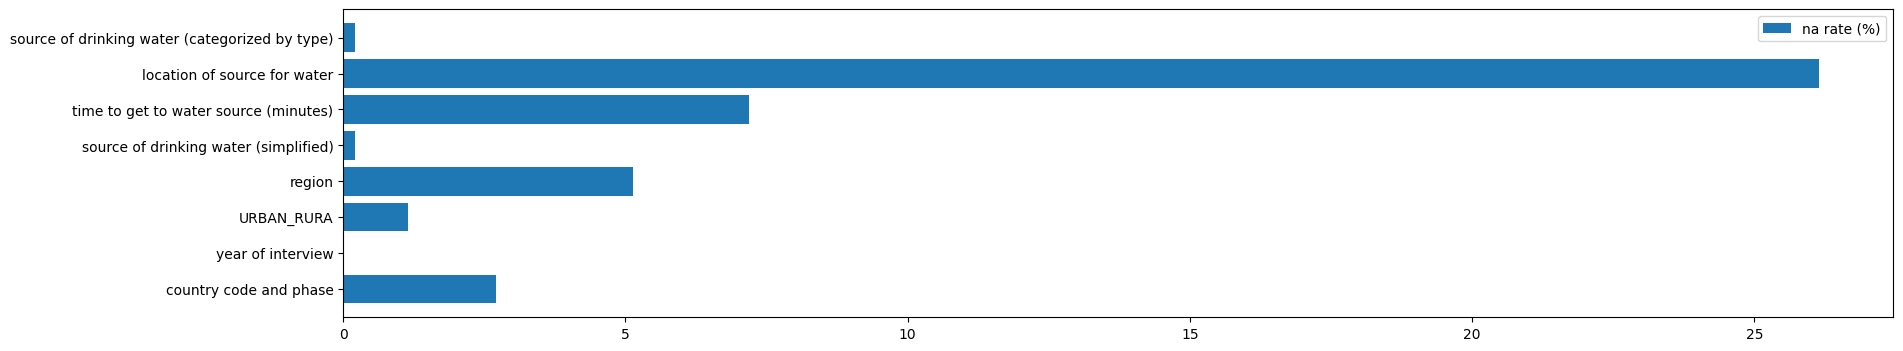

In [100]:
plt.figure(figsize=(20,4))
plt.barh(df_stat.feature, df_stat.na_rate, label='na rate (%)')
plt.legend()
plt.show()

"location of source of water" looks bad as said and need to be removed instead of doing imputation.
"time to get to water source (minutes)" has only about 14% missing value and can be imputed.
"source of srinking water (simplified)" has least amount of missing value and very good to impute.

## Define columns 

In [ ]:
col_id = ['PassengerId']
col_target = ['Survived']
col_cat_small = ['Pclass', 'Sex', 'Embarked','Name']
col_cat_big = ['Ticket','Cabin']
col_cat = col_cat_big + col_cat_small
col_num = ['Age', 'SibSp', 'Parch', 'Fare']

In [41]:
df_new

,source of drinking water (simplified)_piped into dwelling,source of drinking water (simplified)_piped to yard/plot,source of drinking water (simplified)_public tap/standpipe,source of drinking water (simplified)_protected spring,source of drinking water (simplified)_street vendor,source of drinking water (simplified)_surface water,source of drinking water (simplified)_protected well,source of drinking water (simplified)_unprotected well,source of drinking water (simplified)_unprotected spring,source of drinking water (simplified)_bottled,source of drinking water (simplified)_Tube well or borehole,source of drinking water (simplified)_rainwater,source of drinking water (simplified)_other,source of drinking water (simplified)_piped to neighbor,source of drinking water (simplified)_nan,source of drinking water (simplified)_sachet,time to get to water source (minutes),location of source for water
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970631,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,in own yard/plot
970632,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,in own yard/plot
970633,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10.0,elsewhere
970634,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,in own yard/plot


In [43]:
print(df_new['location of source for water'].isnull().sum())

253822


In [45]:
print(df_loc['location of source for water_nan'].isnull().sum())

0


# multi-linear regression

location of source of water(output)= B0+source of drinking water*B1+....+time to get to water source(minutes)*B_n+e

In [52]:
#setting input and output variables

In [53]:
x=df_new.drop('location of source for water', axis=1)

In [54]:
x

,source of drinking water (simplified)_piped into dwelling,source of drinking water (simplified)_piped to yard/plot,source of drinking water (simplified)_public tap/standpipe,source of drinking water (simplified)_protected spring,source of drinking water (simplified)_street vendor,source of drinking water (simplified)_surface water,source of drinking water (simplified)_protected well,source of drinking water (simplified)_unprotected well,source of drinking water (simplified)_unprotected spring,source of drinking water (simplified)_bottled,source of drinking water (simplified)_Tube well or borehole,source of drinking water (simplified)_rainwater,source of drinking water (simplified)_other,source of drinking water (simplified)_piped to neighbor,source of drinking water (simplified)_nan,source of drinking water (simplified)_sachet,time to get to water source (minutes)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970631,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
970632,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
970633,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10.0
970634,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0


In [55]:
y=df_new['location of source for water']

In [56]:
y

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
                ...       
970631    in own yard/plot
970632    in own yard/plot
970633           elsewhere
970634    in own yard/plot
970635           elsewhere
Name: location of source for water, Length: 970636, dtype: object

In [57]:
#splitting the dataset
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [58]:
#multiple linear regression model

#creating linear regression instance 'mlr'
mlr=LinearRegression()
mlr.fit(x_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# KNN imputer

In [59]:
from sklearn.impute import KNNImputer

In [67]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_new_x=pd.DataFrame(imputer.fit_transform(x)) #imputed x

In [77]:
df_new_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970631,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
970632,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
970633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
970634,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
value = df_new_x.isnull().values.any()
print(value) #no missing values

False


In [83]:
#splitting the dataset
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df_new_x,y,test_size=0.3,random_state=100)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [86]:
#multiple linear regression model

#creating linear regression instance 'mlr'
mlr=LinearRegression()
mlr.fit(x_train,y_train)

ValueError: Input contains NaN

# prediction on the test set

In [ ]:
y_pred_mlr=mlr.predict(x_test)

In [ ]:
print("prediction for test set:{}".format(y_pred_mlr))

In [ ]:
#actual value and the predicted value

mlr_diff=pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

# evaluating the model

In [64]:
from sklearn import metrics

In [ ]:
meanAbErr=metrics.mean_absolute_error(y_test,y_pred_mlr)
meanSqErr=metrics.mean_squared_error(y_test,y_pred_mlr)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test,y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:',meanSqErr)
printprint('Root Mean Square Error:', rootMeanSqErr)

In [29]:
!pip install --upgrade tensorflow-gpu

Requirement already up-to-date: tensorflow-gpu in ./newvenv/lib/python3.8/site-packages (2.10.0)


In [30]:
!pip install --upgrade keras

Requirement already up-to-date: keras in ./newvenv/lib/python3.8/site-packages (2.10.0)


In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# GAN

In [1]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

NameError: name 'np' is not defined

In [150]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [151]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

Epoch 1/1


2022-11-13 13:09:32.561760: E tensorflow/stream_executor/cuda/cuda_blas.cc:218] failed to create cublas handle: cublas error
2022-11-13 13:09:32.561784: E tensorflow/stream_executor/cuda/cuda_blas.cc:220] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-11-13 13:09:32.561797: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at matmul_op_impl.h:620 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Exception encountered when calling layer "dense_12" "                 f"(type Dense).

{{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:GPU:0}} Attempting to perform BLAS operation using StreamExecutor without BLAS support [Op:MatMul]

Call arguments received by layer "dense_12" "                 f"(type Dense):
  • inputs=tf.Tensor(shape=(32, 30), dtype=float32)

In [141]:
train_gan(gan, dataset, batch_size, codings_size)

Epoch 1/50


2022-11-13 12:56:06.403412: E tensorflow/stream_executor/cuda/cuda_blas.cc:218] failed to create cublas handle: cublas error
2022-11-13 12:56:06.403432: E tensorflow/stream_executor/cuda/cuda_blas.cc:220] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-11-13 12:56:06.403445: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at matmul_op_impl.h:620 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Exception encountered when calling layer "dense_6" "                 f"(type Dense).

{{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:GPU:0}} Attempting to perform BLAS operation using StreamExecutor without BLAS support [Op:MatMul]

Call arguments received by layer "dense_6" "                 f"(type Dense):
  • inputs=tf.Tensor(shape=(32, 30), dtype=float32)

# multi-linear regression

## unique values in each columns

In [51]:
#unique values in each columns

for x in df.columns:
    #printing unique values
    print(x,':', len(df[x].unique()))

country code and phase : 62
year of interview : 15
URBAN_RURA : 3
region : 395
source of drinking water (simplified) : 16
time to get to water source (minutes) : 280
location of source for water : 4
source of drinking water (categorized by type) : 9


In [32]:
df['GEID'].value_counts()

NGGE7BFL    40427
NGGE6AFL    38522
KEGE71FL    36430
EGGE61FL    28175
MWGE7AFL    26361
            ...  
GNGE81FL     3985
MWGE7IFL     3729
MWGE71FL     3405
MWGE6AFL     3404
MLGE63FL     1617
Name: GEID, Length: 87, dtype: int64

In [33]:
# find the top 10 most frequent categories
df.GEID.value_counts().sort_values(ascending=False).head(10)

NGGE7BFL    40427
NGGE6AFL    38522
KEGE71FL    36430
EGGE61FL    28175
MWGE7AFL    26361
GHGE7IFL    26324
MWGE62FL    24825
UGGE7AFL    19588
CDGE61FL    18171
BJGE61FL    17422
Name: GEID, dtype: int64

# dummy encoder

In [34]:
df_ohe=pd.get_dummies(df)
print(df_ohe)

        year of interview  time to get to water source (minutes)  \
0                  2011.0                                    NaN   
1                  2011.0                                    NaN   
2                  2011.0                                    NaN   
3                  2011.0                                    NaN   
4                  2011.0                                    NaN   
...                   ...                                    ...   
970631             2015.0                                    0.0   
970632             2015.0                                    0.0   
970633             2015.0                                   10.0   
970634             2015.0                                    0.0   
970635             2015.0                                   10.0   

        GEID_AOGE61FL  GEID_AOGE71FL  GEID_BFGE61FL  GEID_BFGE71FL  \
0                   1              0              0              0   
1                   1              0       

In [35]:
df_ohe.shape

(970636, 572)

In [36]:
dataset1=[df,df_ohe]

In [37]:
df_new=pd.concat(dataset1,axis=1, join='inner')

In [38]:
df_new

,GEID,country code and phase,year of interview,URBAN_RURA,region,source of drinking water (simplified),time to get to water source (minutes),location of source for water,source of drinking water (categorized by type),year of interview,...,location of source for water_in own dwelling,location of source for water_in own yard/plot,source of drinking water (categorized by type)_bottled,source of drinking water (categorized by type)_other,source of drinking water (categorized by type)_piped,source of drinking water (categorized by type)_spring,source of drinking water (categorized by type)_street vendor,source of drinking water (categorized by type)_surface water,source of drinking water (categorized by type)_tube well or borehole,source of drinking water (categorized by type)_well
0,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,piped,2011.0,...,0,0,0,0,1,0,0,0,0,0
1,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,piped,2011.0,...,0,0,0,0,1,0,0,0,0,0
2,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,piped,2011.0,...,0,0,0,0,1,0,0,0,0,0
3,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,piped,2011.0,...,0,0,0,0,1,0,0,0,0,0
4,AOGE61FL,AO5,2011.0,U,mesoendemica estavel,piped into dwelling,NaN,NaN,piped,2011.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970631,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,well,2015.0,...,0,1,0,0,0,0,0,0,0,1
970632,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,well,2015.0,...,0,1,0,0,0,0,0,0,0,1
970633,ZWGE72FL,ZW7,2015.0,R,mashonaland east,unprotected well,10.0,elsewhere,well,2015.0,...,0,0,0,0,0,0,0,0,0,1
970634,ZWGE72FL,ZW7,2015.0,R,mashonaland east,protected well,0.0,in own yard/plot,well,2015.0,...,0,1,0,0,0,0,0,0,0,1


In [39]:
df_new.shape

(970636, 581)

# one-hot encoding

In [40]:
from category_encoders.one_hot import OneHotEncoder

In [41]:
#creating instance of one-hot encoder
encoder=OneHotEncoder(handle_unknown='ignore')

In [21]:
ohe=OneHotEncoder(use_cat_names=True)
ohe.fit_transform(df['source of drinking water (simplified)'])

,GEID_AOGE61FL,GEID_AOGE71FL,GEID_BFGE61FL,GEID_BFGE71FL,GEID_BFGE7AFL,GEID_BJGE61FL,GEID_BJGE71FL,GEID_BUGE61FL,GEID_BUGE6AFL,GEID_BUGE71FL,...,location of source for water_in own dwelling,source of drinking water (categorized by type)_piped,source of drinking water (categorized by type)_spring,source of drinking water (categorized by type)_street vendor,source of drinking water (categorized by type)_surface water,source of drinking water (categorized by type)_well,source of drinking water (categorized by type)_bottled,source of drinking water (categorized by type)_tube well or borehole,source of drinking water (categorized by type)_other,source of drinking water (categorized by type)_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
970632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
970633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
970634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
